In [189]:
import pandas as pd
from matplotlib import pyplot as plt

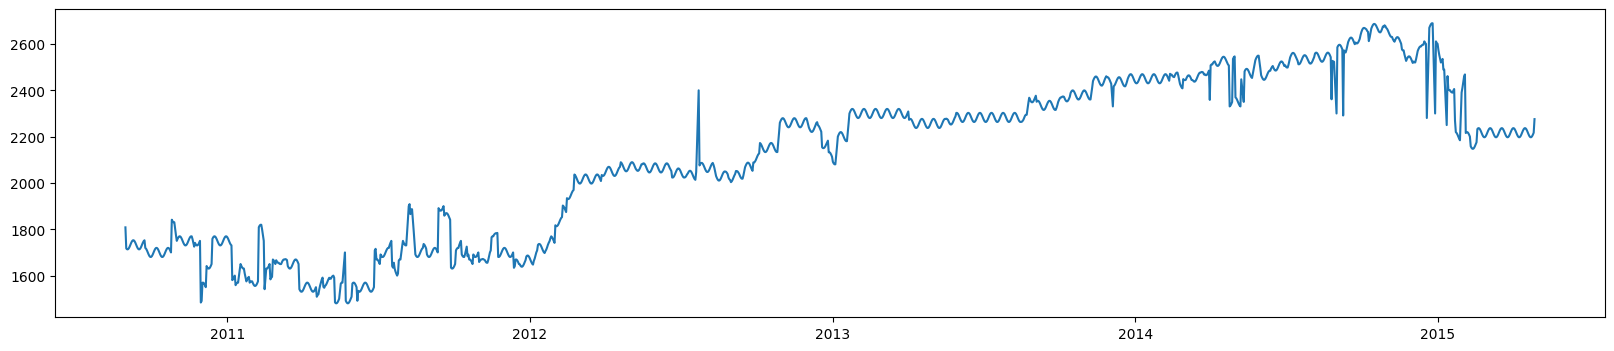

In [190]:
df = pd.read_csv("./data/market/Rice.Nagpur.csv")
df["Date"] = pd.to_datetime(df["Date"])
plt.figure(figsize=(20, 4))
plt.plot(df["Date"], df["Price"])

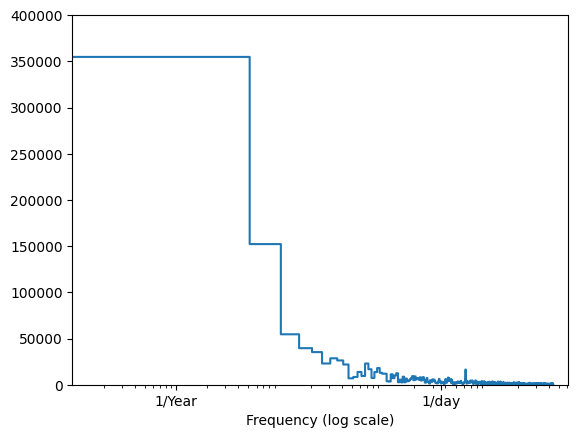

In [191]:
import tensorflow as tf
import numpy as np

fft = tf.signal.rfft(df["Price"])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df["Price"])
hours_per_year = 24 * 365.2524
years_per_dataset = n_samples_h / (hours_per_year)

f_per_year = f_per_dataset / years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale("log")
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=["1/Year", "1/day"])
_ = plt.xlabel("Frequency (log scale)")

In [192]:
df["Timestamp"] = np.arange(len(df))
date = df["Date"]
df = df.drop(columns=["Date"])

In [193]:
sequence_length = 7

sequences = []
for i in range(len(df) - sequence_length):
    seq = df.iloc[i : i + sequence_length]
    sequences.append(seq.values)

In [194]:
sequences = np.array(sequences).astype("float32")

In [195]:
X = sequences[:, :, :-1]
y = sequences[:, -1, -1]

TRAIN_LEN = int(0.7 * len(X))
TEST_LEN = int(0.1 * len(X))
VAL_LEN = len(X) - TRAIN_LEN - TEST_LEN

X_train = X[:TRAIN_LEN]
X_test = X[TRAIN_LEN : TRAIN_LEN + TEST_LEN]
X_val = X[-VAL_LEN:]


y_train = y[:TRAIN_LEN]
y_test = y[TRAIN_LEN : TRAIN_LEN + TEST_LEN]
y_val = y[-VAL_LEN:]

In [196]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential(
    [
        LSTM(units=50, activation="relu", input_shape=(sequence_length, X.shape[2])),
        Dense(1),
    ]
)

model.compile(optimizer="adam", loss="mean_squared_error")

In [197]:
model.fit(X_train, y_train, batch_size=14, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
85/85 [==============================] - 1s 6ms/step - loss: 76441.8750 - val_loss: 513113.7500
Epoch 2/50
85/85 [==============================] - 0s 3ms/step - loss: 69126.1875 - val_loss: 902673.3125
Epoch 3/50
85/85 [==============================] - 0s 4ms/step - loss: 73036.6797 - val_loss: 599302.5000
Epoch 4/50
85/85 [==============================] - 0s 4ms/step - loss: 69229.9141 - val_loss: 513321.2812
Epoch 5/50
85/85 [==============================] - 0s 3ms/step - loss: 69455.6875 - val_loss: 573148.1250
Epoch 6/50
85/85 [==============================] - 0s 3ms/step - loss: 69620.1875 - val_loss: 610320.0625
Epoch 7/50
85/85 [==============================] - 0s 4ms/step - loss: 69369.8984 - val_loss: 566486.0000
Epoch 8/50
85/85 [==============================] - 0s 4ms/step - loss: 70397.0156 - val_loss: 625518.6250
Epoch 9/50
85/85 [==============================] - 0s 4ms/step - loss: 69620.6172 - val_loss: 550652.3750
Epoch 10/50
85/85 [==================

In [220]:
predicted_value = model.predict(X_test)

6/6 [==============================] - 0s 2ms/step


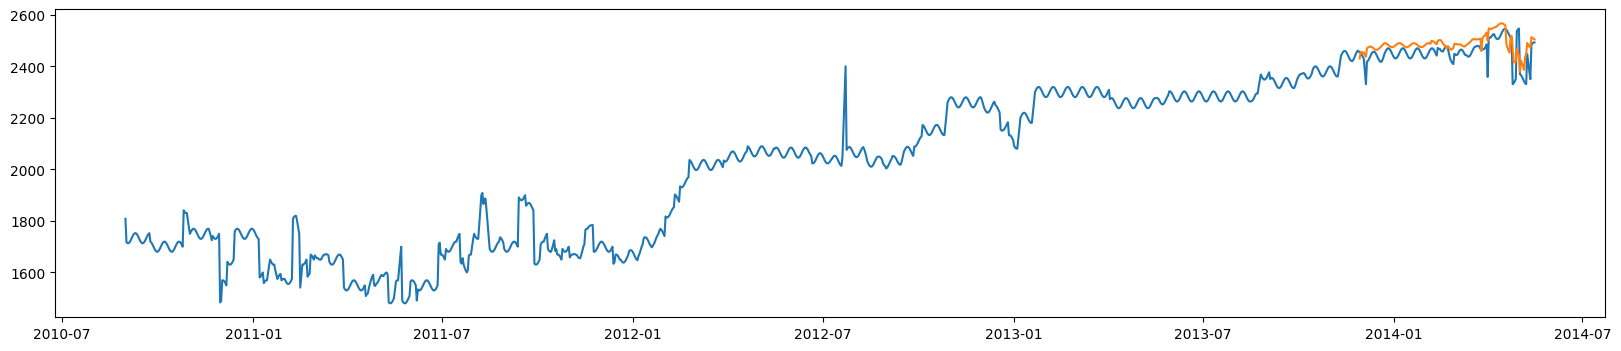

In [227]:
plt.figure(figsize=(20, 4))
plt.plot(date[: TRAIN_LEN + TEST_LEN], df["Price"][: TRAIN_LEN + TEST_LEN])
plt.plot(date[TRAIN_LEN : TRAIN_LEN + TEST_LEN], predicted_value.flatten() * 3)

TODO: Let's see next what data looks like after the week.